In [57]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [58]:
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)
matplotlib.rc('font', family=font_prop)

Malgun Gothic


In [59]:
data = pd.read_csv('../data/인구현황.csv')
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [60]:
df= data.loc[data['행정기관']!='전국'].copy()

In [61]:
data_df = df.sort_values(by='총인구수', ascending=False).head(5)
data_df[['행정기관','총인구수']].head()

,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


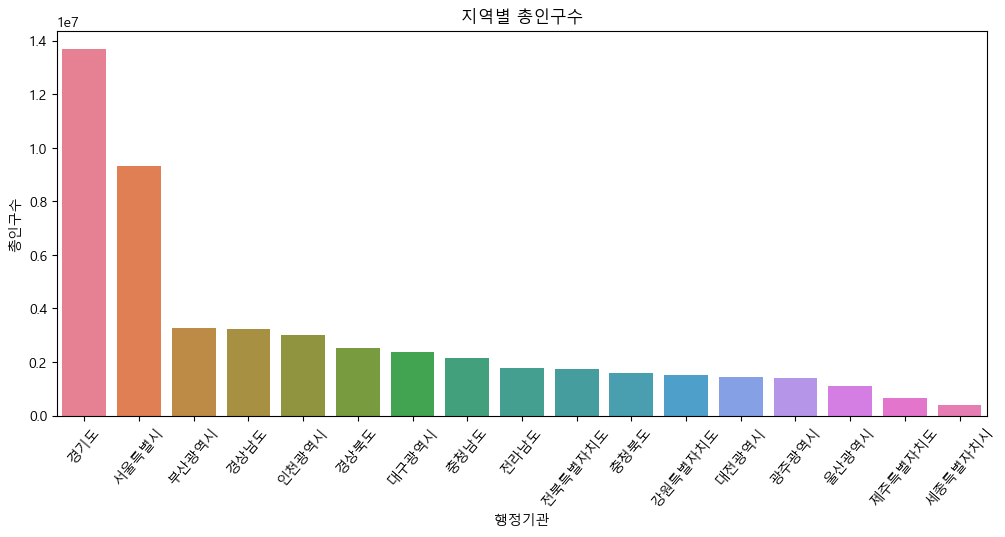

In [63]:
plt.figure(figsize=(12,5))
sns.barplot(x='행정기관', y='총인구수', data=df.sort_values(by='총인구수', ascending=False), hue='행정기관')


plt.xticks(rotation=50)
plt.title('지역별 총인구수')
plt.show()

In [64]:
data_df = df.sort_values(by='세대당 인구', ascending=False).head(5)
data_df[['행정기관','세대당 인구']].reset_index(drop=True)

,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


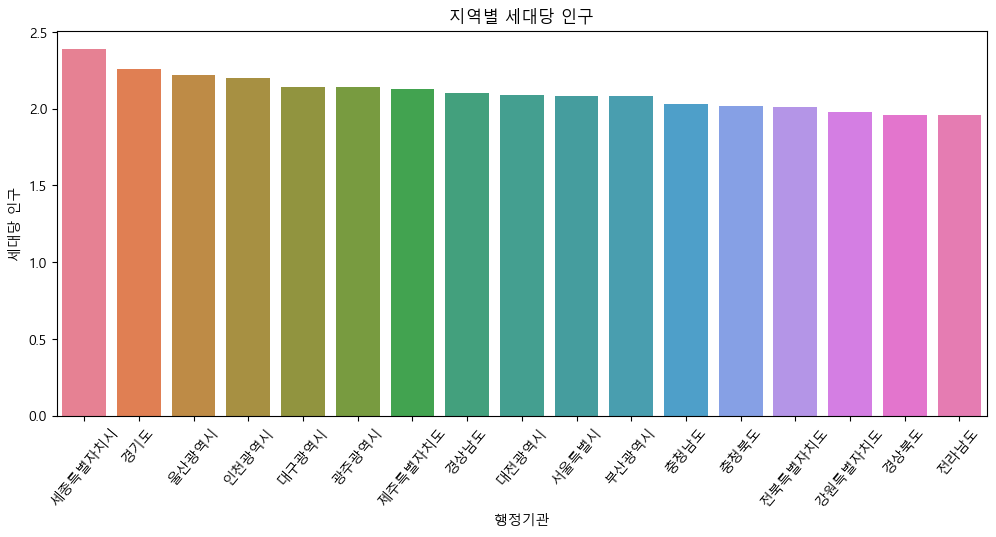

In [65]:
plt.figure(figsize=(12,5))
sns.barplot(x='행정기관', y='세대당 인구', data=df.sort_values(by='세대당 인구', ascending=False), hue='행정기관')


plt.xticks(rotation=50)
plt.title('지역별 세대당 인구')
plt.show()


In [66]:
data_df = df.sort_values(by='남여 비율', ascending=False)
data_df[['행정기관','남여 비율']].reset_index(drop=True)


,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,전라남도,1.02
4,경상북도,1.02
5,경상남도,1.02
6,강원특별자치도,1.01
7,경기도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


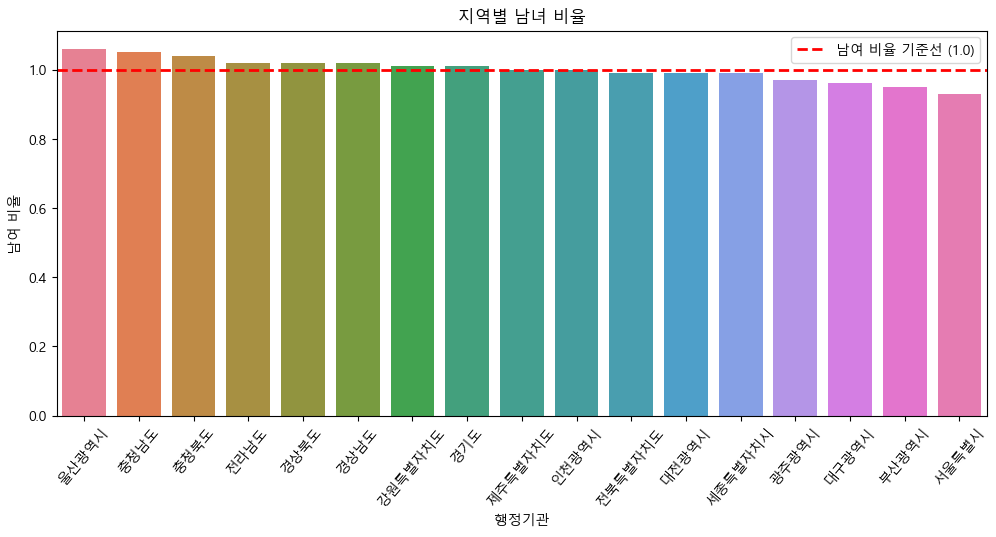

In [67]:
plt.figure(figsize=(12,5))
sns.barplot(x='행정기관', y='남여 비율', data=df.sort_values(by='남여 비율', ascending=False), hue='행정기관')
plt.axhline(y=1.0, color='red', linestyle='--', linewidth=2, label='남여 비율 기준선 (1.0)')

plt.xticks(rotation=50)
plt.legend()
plt.title("지역별 남녀 비율")
plt.show()

In [68]:
data_df.loc[data_df['남자 인구수'] == data_df['여자 인구수'], '남초여초'] = '동일'
data_df.loc[data_df['남자 인구수'] > data_df['여자 인구수'], '남초여초'] = '남초'
data_df.loc[data_df['남자 인구수'] < data_df['여자 인구수'], '남초여초'] = '여초'

data_df[['행정기관', '남여 비율', '남초여초']]

,행정기관,남여 비율,남초여초
7,울산광역시,1.06,남초
12,충청남도,1.05,남초
11,충청북도,1.04,남초
14,전라남도,1.02,남초
15,경상북도,1.02,남초
16,경상남도,1.02,남초
10,강원특별자치도,1.01,남초
9,경기도,1.01,남초
17,제주특별자치도,1.00,남초
4,인천광역시,1.00,여초


In [69]:
household_data_for_sorting = round(data_df['세대당 인구'].mean(), 2)
household_data_for_sorting = data_df[['행정기관', '세대당 인구']]
print(f"전국 평균 세대당 인구수:{average_household_size}")
household_data_for_sorting.sort_values(by='세대당 인구',ascending=False).reset_index(drop=True).head(7)


전국 평균 세대당 인구수:2.11


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13


Text(0.5, 1.0, '지역별 세대수')

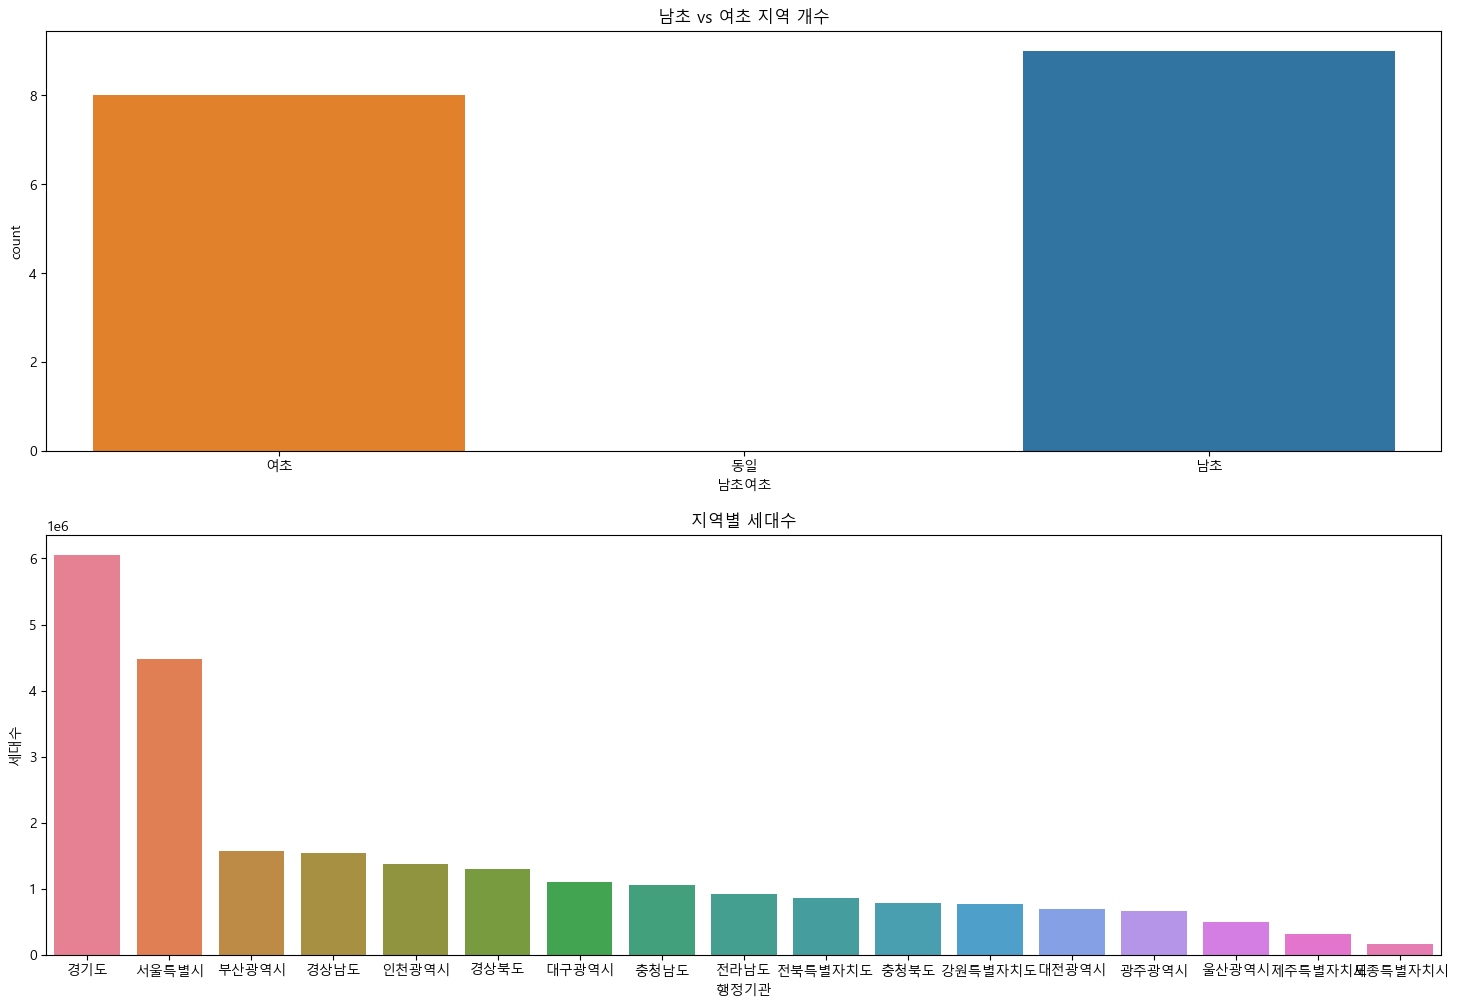

In [75]:
figure, (axes1,axes2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,12)

data_counts=data_df['남초여초'].value_counts()
data_order=['여초','동일','남초']


sns.countplot(data=data_df, x='남초여초', ax=axes1, order=['여초','동일','남초'], hue='남초여초')
sns.barplot(x='행정기관', y='세대수', ax=axes2, data=data_df.sort_values(by='세대수', ascending=False), hue='행정기관')

axes1.set_title('남초 vs 여초 지역 개수')
axes2.set_title('지역별 세대수')

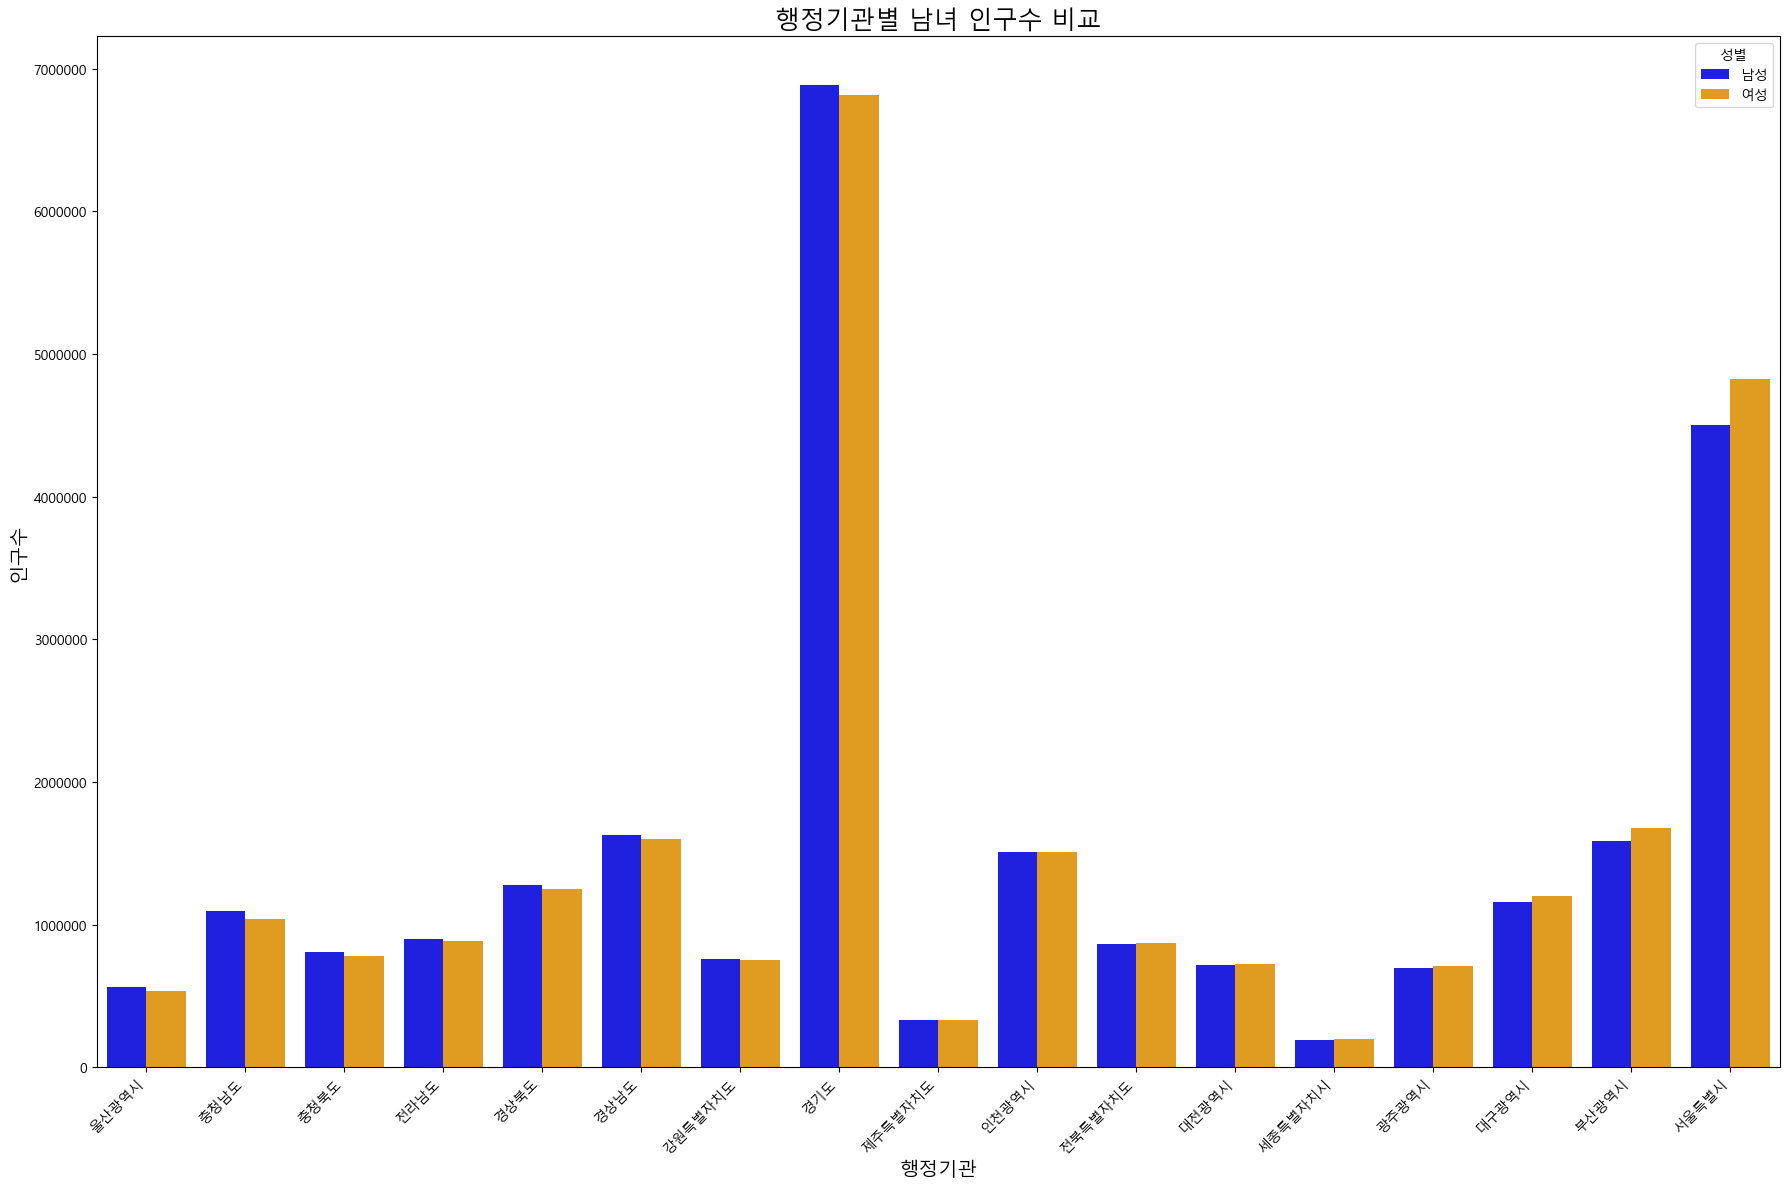

In [84]:
df_melted = data_df.melt(id_vars=['행정기관'],
    value_vars=['남자 인구수', '여자 인구수'],
    var_name='성별',        
    value_name='인구수'     
)

df_melted['성별'] = df_melted['성별'].replace({'남자 인구수': '남성', '여자 인구수': '여성'})

figure, axes1 = plt.subplots(nrows=1, ncols=1, figsize=(18, 12)) 

sns.barplot(
    data=df_melted,
    x='행정기관',
    y='인구수',
    hue='성별', 
    palette={'남성': 'blue', '여성': 'orange'},
    ax=axes1
)

plt.xticks(rotation=45, ha='right')

axes1.ticklabel_format(style='plain', axis='y')

axes1.set_title('행정기관별 남녀 인구수 비교', fontsize=18)
axes1.set_ylabel('인구수', fontsize=14)
axes1.set_xlabel('행정기관', fontsize=14)


plt.tight_layout()
plt.show()